In [71]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft

Question 1

In [72]:
#This function computes the convolution of 2 arrays
def convolve(f,g):
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)
    return np.fft.irfft(F_f*F_g, f.size)

In [73]:
def array_shifter(f,shift):

    #Taking the modulo of the shift in case it exceed the lenght of our array
    shift = shift%f.size

    #Constructing g as explained in pdf
    g = np.zeros(f.size)
    g[shift] = 1

    #Doing the convolution of f and g
    return convolve(f,g)

In [74]:
#This function outputs a gaussian 
def gaussian(x,mu,sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)

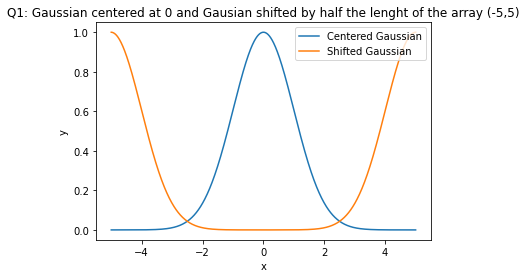

In [75]:
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
yshifted = array_shifter(y, int(len(y)/2))

plt.title("Q1: Gaussian centered at 0 and Gausian shifted by half the lenght of the array (-5,5)")
plt.plot(x,y, label="Centered Gaussian")
plt.plot(x,yshifted, label="Shifted Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("plot1.png")

Question 2

In [76]:
#This function computes the correlation function of 2 arrays
def correl_fct(f,g):
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)
    return np.fft.irfft(F_f*np.conjugate(F_g), f.size)

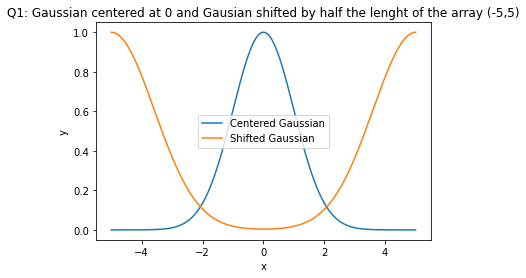

In [77]:
ycorell = correl_fct(y,y)
ycorell = ycorell/np.max(ycorell)

plt.title("")
plt.plot(x,y, label="Centered Gaussian")
plt.plot(x,ycorell, label="Shifted Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("plot2.png")

Question 2 b)

In [78]:
#This function take the correllation betwen an array with a shifted version of itself
def gaussian_correlator(y,shift):
    yshifted = array_shifter(y,shift)
    return correl_fct(y,yshifted)

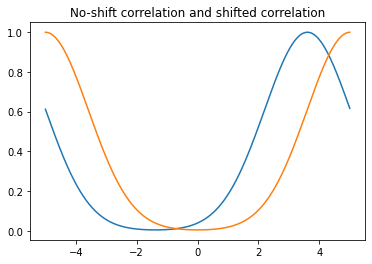

In [89]:
#taking the correlation of y and y shifted by n
# is equal to the correlation with itself shifted by len(x)-n
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
correl3 = gaussian_correlator(y,140)
correl3 /= max(correl3)

plt.plot(x,correl3)

no_shift = correl_fct(y,y)
no_shift /= max(no_shift)
plt.plot(x,no_shift)
plt.title("No-shift correlation and shifted correlation")
plt.savefig("plot3.png")

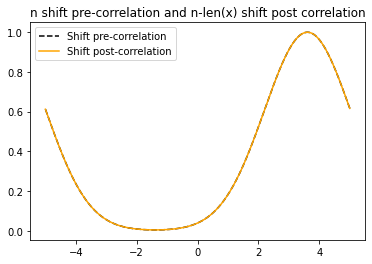

In [80]:
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
correl3 = gaussian_correlator(y,140)
correl3 /= max(correl3)

plt.plot(x,correl3, linestyle="--", color= "black", label= "Shift pre-correlation")

test = correl_fct(y,y)
test /= max(test)
test = array_shifter(test,x.size-140)
plt.plot(x,test, label= "Shift post-correlation", color="orange")

plt.title("n shift pre-correlation and n-len(x) shift post correlation")
plt.legend()
plt.savefig("plot4.png")

The goal of this plot is to demonstrate that taking the correlation of y and y shifted by n is equal to the correlation with itself shifted by len(x)-n

Question 3)

In [81]:


def safe_convolution(f,g):

    ldiff = f.size-g.size 

    if ldiff > 0:
        f_padding = np.zeros(f.size)
        g_padding = np.zeros(f.size + int(ldiff/2))
    else:
        f_padding = np.zeros(g.size+ int(np.abs(ldiff)/2))
        g_padding = np.zeros(g.size)

    f = np.append(f_padding,np.append(f,f_padding))
    g = np.append(g_padding,np.append(g,g_padding))

    if f.size != g.size:
        print("Error: The two array sizes cannot differ by an odd number")
    else:
        return convolve(f,g)


Question 4 c)

In [82]:
def analytic_DFT(k,k0,N):
   adding_ks = (1-np.exp(-2j*np.pi*(k+k0)))/(1-np.exp(-2j*np.pi*(k+k0)/N))
   substracting_ks = (1-np.exp(-2j*np.pi*(k-k0)))/(1-np.exp(-2j*np.pi*(k-k0)/N))
   DFT = (1/2j)*(substracting_ks - adding_ks)
   return np.abs(DFT)

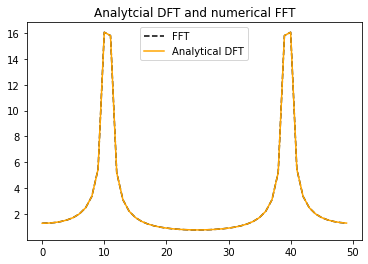

In [91]:
k = 10.5
N  = 50
x  = np.arange(N)

#Using fft from numpy
y = np.sin(2*np.pi*k*x/N)
FFT = np.fft.fft(y)
amp_FFT = np.abs(FFT)

#Using my analytical DFT
anal_DFT = analytic_DFT(x,k,N)

plt.plot(amp_FFT, linestyle="--", color= "black",label="FFT")
plt.plot(anal_DFT, label="Analytical DFT", color="orange")
plt.title("Analytcial DFT and numerical FFT")
plt.legend()

plt.savefig("plot5.png")

In [92]:
print("Mean residuals=", np.mean(amp_FFT-anal_DFT))

Mean residuals= 9.547918011776346e-17


As we can see in this plot the analytcial DFT and the FFT are the same 

Question 4 d)

In [84]:
def window(x,N):
 return 0.5-0.5*np.cos(2*np.pi*x/N) 

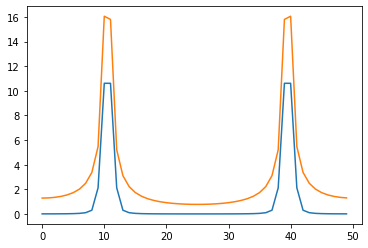

In [85]:
k = 10.5
N  = 50
x  = np.arange(N)

#Using fft from numpy
y = np.sin(2*np.pi*k*x/N)*window(x,N)
FFT = np.fft.fft(y)
amp_FFT = np.abs(FFT)

#Using my analytical DFT
anal_DFT = analytic_DFT(x,k,N)

plt.plot(amp_FFT, label="FFT")
plt.plot(anal_DFT, label="Analytical DFT")
plt.savefig("plot6.png")

As we can see these look more delta-function like. Thus, the window function seems to effectively reduce the spectral leakage 

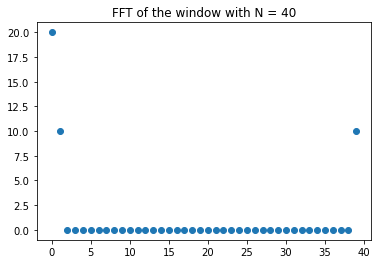

In [86]:
k = 10.5
N  = 40
x  = np.arange(N)

#Using fft from numpy
y = window(x,N)
FFT = np.fft.fft(y)
amp_FFT = np.abs(FFT)

plt.scatter(x,amp_FFT)
plt.title("FFT of the window with N = 40")
plt.savefig("plot7.png")

As we can see G[0] = N/2 = 40/2 = 20, G[1] = N/4 = 40/4 = 10, and G[N-1] = N/4 = 40/4 = 10